<a href="https://colab.research.google.com/github/ZakiNaufal198/coba-coba/blob/main/cek_slp_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_excel('/content/drive/My Drive/dataset/dataset_jst_slp/train_data_eps1.xlsx')
df_test = pd.read_excel('/content/drive/My Drive/dataset/dataset_jst_slp/test_data_eps1.xlsx')

Mounted at /content/drive


In [ ]:
print("DATA TRAIN \n")
# Tampilkan informasi umum , Lihat 5 baris pertama, Cek apakah ada data null
print(df_train.info())
print(df_train.head())
print(df_train.isnull().sum())


print("\n DATA TEST")
# Tampilkan informasi umum
print(df_test.info())
print(df_test.head())
print(df_test.isnull().sum())

DATA TRAIN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   no                            6000 non-null   int64         
 1   name                          6000 non-null   object        
 2   screen_name                   6000 non-null   object        
 3   followers_count               6000 non-null   int64         
 4   friends_count                 6000 non-null   int64         
 5   post_count                    6000 non-null   int64         
 6   lang                          6000 non-null   object        
 7   location                      4830 non-null   object        
 8   default_profile_image         6000 non-null   int64         
 9   profile_use_background_image  6000 non-null   int64         
 10  verified                      6000 non-null   int64         
 11  description      

In [ ]:
print(df_train['fake'].value_counts())
print(df_test['fake'].value_counts())

fake
0    3586
1    2414
Name: count, dtype: int64
fake
0    2391
1    1609
Name: count, dtype: int64


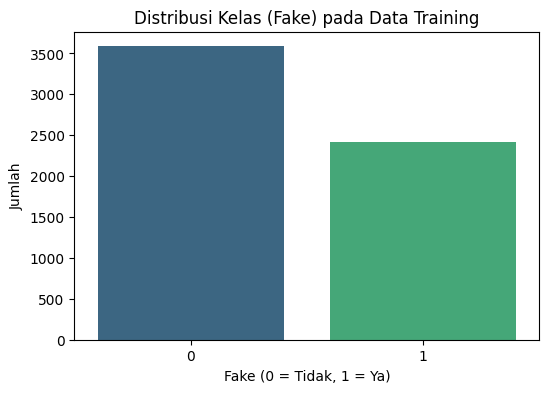

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fake', data=df_train, palette='viridis')
plt.title('Distribusi Kelas (Fake) pada Data Training')
plt.xlabel('Fake (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

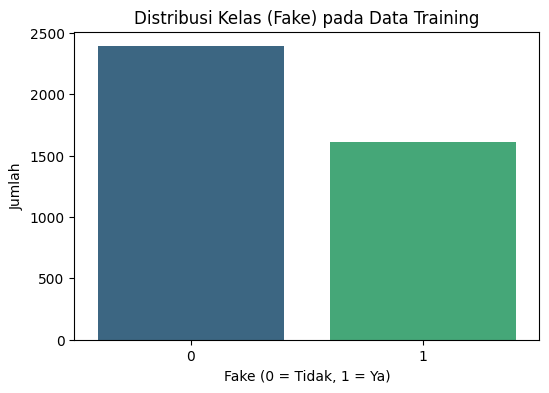

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fake', data=df_test, palette='viridis')
plt.title('Distribusi Kelas (Fake) pada Data Training')
plt.xlabel('Fake (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

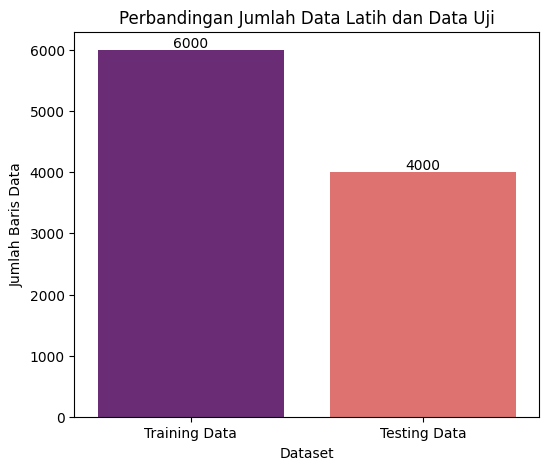

In [ ]:
data_counts = pd.DataFrame({
    'Dataset': ['Training Data', 'Testing Data'],
    'Jumlah': [len(df_train), len(df_test)]
})

plt.figure(figsize=(6, 5))
bar_plot = sns.barplot(x='Dataset', y='Jumlah', data=data_counts, palette='magma')
plt.title('Perbandingan Jumlah Data Latih dan Data Uji')
for container in bar_plot.containers:
    plt.bar_label(container)
plt.ylabel('Jumlah Baris Data')
plt.show()

In [ ]:
current_date = datetime(2025, 11, 28)

df_train['created_at'] = pd.to_datetime(df_train['created_at'], errors='coerce')
df_train['created_at'].fillna(df_train['created_at'].mean(), inplace=True)
df_train['account_age_days'] = (current_date - df_train['created_at']).dt.days


df_test['created_at'] = pd.to_datetime(df_test['created_at'], errors='coerce')
df_test['created_at'].fillna(df_test['created_at'].mean(), inplace=True)
df_test['account_age_days'] = (current_date - df_test['created_at']).dt.days

In [ ]:
# df_train['description'] = df_train['description'].fillna('')
# df_test['description'] = df_test['description'].fillna('')

# df_train['description_len'] = df_train['description'].apply(len)
# df_test['description_len'] = df_test['description'].apply(len)

In [ ]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   no                            6000 non-null   int64         
 1   name                          6000 non-null   object        
 2   screen_name                   6000 non-null   object        
 3   followers_count               6000 non-null   int64         
 4   friends_count                 6000 non-null   int64         
 5   post_count                    6000 non-null   int64         
 6   lang                          6000 non-null   object        
 7   location                      4830 non-null   object        
 8   default_profile_image         6000 non-null   int64         
 9   profile_use_background_image  6000 non-null   int64         
 10  verified                      6000 non-null   int64         
 11  description                   

,no,name,screen_name,followers_count,friends_count,post_count,lang,location,default_profile_image,profile_use_background_image,verified,description,created_at,fake,account_age_days
0,1,Stacey Perry,I_MbgLz,157,94,18,de,NaN,1,0,0,Level down second quality affect especially la...,2023-12-06,1,723
1,2,Stacey Fitzgerald,i2zRuI7u,67,1407,20,fr,Mendozaside,1,0,0,Hold family whole condition camera thing soon ...,2018-08-29,0,2648
2,3,Maria Cox,pZo0UlBT2,2478,535,484,es,North Nancytown,1,1,0,Single owner thank.,2016-12-18,0,3267
3,4,Colleen Davis,5S7maDT,271,70,6,en,NaN,0,0,0,Expert candidate team soldier moment such high.,2024-03-23,1,615
4,5,Brian Hughes,dEvICx15P,94,391,10,de,Markville,1,1,0,Imagine of cover recognize natural professor r...,2019-07-27,1,2316


In [ ]:
df_test.info()
df_test.head()
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   no                            4000 non-null   int64         
 1   name                          4000 non-null   object        
 2   screen_name                   4000 non-null   object        
 3   followers_count               4000 non-null   int64         
 4   friends_count                 4000 non-null   int64         
 5   post_count                    4000 non-null   int64         
 6   lang                          4000 non-null   object        
 7   location                      3172 non-null   object        
 8   default_profile_image         4000 non-null   int64         
 9   profile_use_background_image  4000 non-null   int64         
 10  verified                      4000 non-null   int64         
 11  description                   

,0
no,0
name,0
screen_name,0
followers_count,0
friends_count,0
post_count,0
lang,0
location,828
default_profile_image,0
profile_use_background_image,0


In [ ]:
df_train['location'] = df_train['location'].fillna('Unknown')
df_test['location'] = df_test['location'].fillna('Unknown')

print("Jumlah Missing Value di Location (Train):", df_train['location'].isnull().sum())
print("Jumlah Missing Value di Location (Test):", df_test['location'].isnull().sum())

Jumlah Missing Value di Location (Train): 0
Jumlah Missing Value di Location (Test): 0


In [ ]:
# Encode fitur kategorikal
le = LabelEncoder()
for col in ['location']:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])


In [ ]:
numerical_cols = ['followers_count', 'friends_count', 'post_count', 'location', 'default_profile_image', 'profile_use_background_image', 'verified']

features = numerical_cols + ['account_age_days']
X = df_train[features]
y = df_train['fake'] # Kolom target

In [ ]:
X_train = df_train[features].copy()
y_train = df_train['fake'].copy()

X_test = df_test[features].copy()
y_test = df_test['fake'].copy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

# Mengabaikan FutureWarnings dari sklearn untuk output yang lebih bersih
warnings.filterwarnings('ignore', category=FutureWarning)

# Redefine features and scale data for this cell's execution
numerical_cols = ['followers_count', 'friends_count', 'post_count', 'location', 'default_profile_image', 'profile_use_background_image', 'verified']

features = numerical_cols + ['account_age_days']
X_train = df_train[features].copy()
y_train = df_train['fake'].copy()

X_test = df_test[features].copy()
y_test = df_test['fake'].copy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ✨ Definisi Kelas Single Layer Perceptron
# Menggunakan fungsi aktivasi Sigmoid dan Aturan Delta untuk pelatihan
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def _sigmoid(self, x):
        """Fungsi aktivasi Sigmoid: 1 / (1 + e^(-x))"""
        # Mencegah overflow pada np.exp dengan memotong nilai input
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """Turunan Sigmoid: f'(x) = f(x) * (1 - f(x))"""
        return x * (1 - x)

    def _binary_cross_entropy_loss(self, y_true, y_pred):
        """Menghitung Binary Cross-Entropy Loss"""
        # Menghindari log(0) dengan mengklip nilai prediksi
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def train(self, X, y):
        n_features = X.shape[1]

        # Inisialisasi Bobot dan Bias
        np.random.seed(42)
        # Inisialisasi bobot seragam antara -0.5 dan 0.5
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=n_features)
        self.bias = 0.00

        print(f"Memulai pelatihan selama {self.epochs} epoch dengan learning rate {self.learning_rate}")

        # Proses pelatihan
        for epoch in range(self.epochs):
            # Iterasi melalui setiap sampel dalam dataset
            for X_i, y_i in zip(X, y):
                # 1. FASE FEED-FORWARD
                # Input bersih (net_input) = (X_i * Bobot) + Bias
                net_input = np.dot(X_i, self.weights) + self.bias
                # Output aktual (output_y) = Sigmoid(net_input)
                output_y = self._sigmoid(net_input)

                # 2. FASE TRAINING (Pembaruan Bobot)
                # Hitung error (kesalahan)
                error = y_i - output_y

                # Aturan Delta (Gradien): delta = error * turunan_sigmoid(output_y)
                # Turunan Sigmoid dihitung berdasarkan output_y karena output_y = sigmoid(net_input)
                delta = error * self._sigmoid_derivative(output_y)

                # Perbarui Bobot: W_baru = W_lama + learning_rate * delta * X_i
                self.weights += self.learning_rate * delta * X_i

                # Perbarui Bias: Bias_baru = Bias_lama + learning_rate * delta
                self.bias += self.learning_rate * delta

            # Tampilkan kemajuan setiap epoch
            net_input_all = np.dot(X, self.weights) + self.bias
            output_y_all = self._sigmoid(net_input_all)
            y_pred_epoch_raw = output_y_all # raw sigmoid output for loss calculation
            y_pred_epoch = (output_y_all >= 0.5).astype(int) # binary predictions for accuracy

            acc = accuracy_score(y, y_pred_epoch)
            loss = self._binary_cross_entropy_loss(y, y_pred_epoch_raw)
            print(f"Epoch {epoch + 1}/{self.epochs}, Akurasi Pelatihan: {acc:.4f}, Loss Pelatihan: {loss:.4f}")
        print("Pelatihan selesai.")

    def predict(self, X):
        """Melakukan prediksi berdasarkan bobot dan bias yang telah dilatih"""
        net_input = np.dot(X, self.weights) + self.bias
        output = self._sigmoid(net_input)
        # Mengkonversi output probabilitas ke klasifikasi biner (0 atau 1)
        return (output >= 0.5).astype(int)


## ✨ Pelatihan dan Evaluasi Model Perceptron
# Inisialisasi model
# Gunakan learning_rate yang lebih kecil dan epochs yang lebih banyak untuk konvergensi yang lebih baik
model_slp = SingleLayerPerceptron(learning_rate=0.01, epochs=1000)

# Pelatihan model
model_slp.train(X_train_scaled, y_train.values)

# --- Prediksi pada Data Pelatihan ---
y_train_pred = model_slp.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate training loss for the final state
net_input_train_final = np.dot(X_train_scaled, model_slp.weights) + model_slp.bias
output_train_final = model_slp._sigmoid(net_input_train_final)
loss_train = model_slp._binary_cross_entropy_loss(y_train, output_train_final)

print("\n--- Evaluasi Hasil ---")
print(f"Akurasi Pelatihan Akhir: {accuracy_train:.4f}")
print(f"Loss Pelatihan Akhir: {loss_train:.4f}")

# --- Prediksi pada Data Pengujian ---
y_test_pred = model_slp.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate test loss
net_input_test_final = np.dot(X_test_scaled, model_slp.weights) + model_slp.bias
output_test_final = model_slp._sigmoid(net_input_test_final)
loss_test = model_slp._binary_cross_entropy_loss(y_test, output_test_final)

print(f"Akurasi Pengujian (Test): {accuracy_test:.4f}")
print(f"Loss Pengujian (Test): {loss_test:.4f}")

# --- Detail Model ---
print("\n--- Detail Model Terlatih ---")
print(f"Bobot Akhir (Weights): {model_slp.weights}")
print(f"Bias Akhir: {model_slp.bias:.4f}")

Memulai pelatihan selama 1000 epoch dengan learning rate 0.01
Epoch 1/1000, Akurasi Pelatihan: 0.9193, Loss Pelatihan: 0.2645
Epoch 2/1000, Akurasi Pelatihan: 0.9255, Loss Pelatihan: 0.2307
Epoch 3/1000, Akurasi Pelatihan: 0.9288, Loss Pelatihan: 0.2157
Epoch 4/1000, Akurasi Pelatihan: 0.9318, Loss Pelatihan: 0.2069
Epoch 5/1000, Akurasi Pelatihan: 0.9330, Loss Pelatihan: 0.2009
Epoch 6/1000, Akurasi Pelatihan: 0.9342, Loss Pelatihan: 0.1967
Epoch 7/1000, Akurasi Pelatihan: 0.9352, Loss Pelatihan: 0.1934
Epoch 8/1000, Akurasi Pelatihan: 0.9357, Loss Pelatihan: 0.1908
Epoch 9/1000, Akurasi Pelatihan: 0.9363, Loss Pelatihan: 0.1888
Epoch 10/1000, Akurasi Pelatihan: 0.9367, Loss Pelatihan: 0.1871
Epoch 11/1000, Akurasi Pelatihan: 0.9372, Loss Pelatihan: 0.1857
Epoch 12/1000, Akurasi Pelatihan: 0.9375, Loss Pelatihan: 0.1845
Epoch 13/1000, Akurasi Pelatihan: 0.9378, Loss Pelatihan: 0.1834
Epoch 14/1000, Akurasi Pelatihan: 0.9378, Loss Pelatihan: 0.1826
Epoch 15/1000, Akurasi Pelatihan: 0.9

In [ ]:
# SEED = 42

# # Inisialisasi Model
# slp_model = Perceptron(
#     random_state=SEED,
#     max_iter=1000,
#     tol=1e-3,
#     eta0=0.1
# )

# # Melatih Model
# slp_model.fit(X_train_scaled, y_train)

# # Prediksi
# y_train_pred = slp_model.predict(X_train_scaled)
# y_test_pred = slp_model.predict(X_test_scaled)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

# Mengabaikan FutureWarnings dari sklearn untuk output yang lebih bersih
warnings.filterwarnings('ignore', category=FutureWarning)

## ✨ Definisi Kelas Single Layer Perceptron
# Menggunakan fungsi aktivasi Sigmoid dan Aturan Delta untuk pelatihan
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def __sigmoid(self, x):
        """Fungsi aktivasi Sigmoid: 1 / (1 + e^(-x))"""
        # Mencegah overflow pada np.exp dengan memotong nilai input
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def __sigmoid_derivative(self, x):
        """Turunan Sigmoid: f'(x) = f(x) * (1 - f(x))"""
        return x * (1 - x)

    def __binary_cross_entropy_loss(self, y_true, y_pred):
        """Menghitung Binary Cross-Entropy Loss"""
        # Menghindari log(0) dengan mengklip nilai prediksi
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def train(self, X, y):
        n_features = X.shape[1]

        # Inisialisasi Bobot dan Bias
        np.random.seed(42)
        # Inisialisasi bobot seragam antara -0.5 dan 0.5
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=n_features)
        self.bias = 0.00

        print(f"Memulai pelatihan selama {self.epochs} epoch dengan learning rate {self.learning_rate}")

        # Proses pelatihan
        for epoch in range(self.epochs):
            # Iterasi melalui setiap sampel dalam dataset
            for X_i, y_i in zip(X, y):
                # 1. FASE FEED-FORWARD
                # Input bersih (net_input) = (X_i * Bobot) + Bias
                net_input = np.dot(X_i, self.weights) + self.bias
                # Output aktual (output_y) = Sigmoid(net_input)
                output_y = self.__sigmoid(net_input)

                # 2. FASE TRAINING (Pembaruan Bobot)
                # Hitung error (kesalahan)
                error = y_i - output_y

                # Aturan Delta (Gradien): delta = error * turunan_sigmoid(output_y)
                # Turunan Sigmoid dihitung berdasarkan output_y karena output_y = sigmoid(net_input)
                delta = error * self.__sigmoid_derivative(output_y)

                # Perbarui Bobot: W_baru = W_lama + learning_rate * delta * X_i
                self.weights += self.learning_rate * delta * X_i

                # Perbarui Bias: Bias_baru = Bias_lama + learning_rate * delta
                self.bias += self.learning_rate * delta

            # (Opsional) Tampilkan kemajuan setiap 1000 epoch
            if (epoch + 1) % 1000 == 0:
                # Calculate actual predictions for accuracy and loss
                net_input_all = np.dot(X, self.weights) + self.bias
                output_y_all = self.__sigmoid(net_input_all)
                y_pred_epoch_raw = output_y_all # raw sigmoid output for loss calculation
                y_pred_epoch = (output_y_all >= 0.5).astype(int) # binary predictions for accuracy

                acc = accuracy_score(y, y_pred_epoch)
                loss = self.__binary_cross_entropy_loss(y, y_pred_epoch_raw)
                print(f"Epoch {epoch + 1}/{self.epochs}, Akurasi Pelatihan: {acc:.4f}, Loss Pelatihan: {loss:.4f}")
        print("Pelatihan selesai.")

    def predict(self, X):
        """Melakukan prediksi berdasarkan bobot dan bias yang telah dilatih"""
        net_input = np.dot(X, self.weights) + self.bias
        output = self.__sigmoid(net_input)
        # Mengkonversi output probabilitas ke klasifikasi biner (0 atau 1)
        return (output >= 0.5).astype(int)


## ✨ Pelatihan dan Evaluasi Model Perceptron
# Inisialisasi model
# Gunakan learning_rate yang lebih kecil dan epochs yang lebih banyak untuk konvergensi yang lebih baik
model_slp = SingleLayerPerceptron(learning_rate=0.01, epochs=1000)

# Pelatihan model
model_slp.train(X_train_scaled, y_train.values)

# --- Prediksi pada Data Pelatihan ---
y_train_pred = model_slp.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate training loss for the final state
net_input_train_final = np.dot(X_train_scaled, model_slp.weights) + model_slp.bias
output_train_final = model_slp.__sigmoid(net_input_train_final)
loss_train = model_slp.__binary_cross_entropy_loss(y_train, output_train_final)

print("\n--- Evaluasi Hasil ---")
print(f"Akurasi Pelatihan Akhir: {accuracy_train:.4f}")
print(f"Loss Pelatihan Akhir: {loss_train:.4f}")

# --- Prediksi pada Data Pengujian ---
y_test_pred = model_slp.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate test loss
net_input_test_final = np.dot(X_test_scaled, model_slp.weights) + model_slp.bias
output_test_final = model_slp.__sigmoid(net_input_test_final)
loss_test = model_slp.__binary_cross_entropy_loss(y_test, output_test_final)

print(f"Akurasi Pengujian (Test): {accuracy_test:.4f}")
print(f"Loss Pengujian (Test): {loss_test:.4f}")

# --- Detail Model ---
print("\n--- Detail Model Terlatih ---")
print(f"Bobot Akhir (Weights): {model_slp.weights}")
print(f"Bias Akhir: {model_slp.bias:.4f}")